In [ ]:
!pip install cirq

from IPython.display import clear_output
clear_output()

In [ ]:
import cirq
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

# Task I: Quantum Computing Part

## 1). Implement a simple quantum operation with Cirq

In [ ]:
# Initialize a circuit
circuit = cirq.Circuit()
# Apply a Hadamard operation on 5 qubits (one for every qubit)
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(5))
# Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
circuit.append(cirq.CNOT(q, q+1) for q in cirq.LineQubit.range(4))
# Apply SWAP (0, 4)
circuit.append(cirq.SWAP(cirq.LineQubit(0), cirq.LineQubit(4)))
# Apply Rotate X with pi/2 on any qubit
circuit.append(cirq.rx(np.pi/2)(cirq.LineQubit(np.random.randint(5))))
# Plot the circuit
print(circuit)

0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───


## 2). Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state

In [ ]:
# Initialize a circuit
circuit = cirq.Circuit()
# Apply a series of small cirq.Rx rotations
rotation_angles = np.random.random(5)/10  # small random numbers for the angle of rotation
for i in range(5):
    circuit.append(cirq.rx(rotation_angles[i])(cirq.LineQubit(0)))
# Add a measurement at the end of the circuit
circuit.append(cirq.measure(cirq.LineQubit(0), key='result'))

print(circuit)

0: ───Rx(0.019π)───Rx(0.002π)───Rx(0.014π)───Rx(0.017π)───Rx(0.027π)───M('result')───


The probability of measuring the state in the |0⟩ state: 0.989


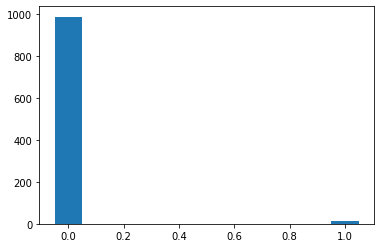

In [ ]:
# Initialize simulator
s=cirq.Simulator()
# Sample the circuit with 1000 shots
samples=s.run(circuit, repetitions=1000)
# Plot the probability of measuring the state in the |0⟩ state
print("The probability of measuring the state in the |0⟩ state:", samples.histogram(key="result")[0]/1000)
data = samples.measurements['result'].reshape(1000,)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.1)
plt.show()